In [1]:
import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('reviews.csv', encoding="ISO-8859-1")
df.head()

,Text,Sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       50000 non-null  object
 1   Sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [3]:
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          25000  24697  When i got this movie free from my job, along ...   
1          25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
Sentiment       
0            3  
1            5

In [5]:
df = df.drop_duplicates()
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          24697  24697  Once again Mr. Costner has dragged out a movie...   
1          24884  24884  I went and saw this movie last night after bei...   

                
          freq  
Sentiment       
0            1  
1            1

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

In [7]:
text = vectorizer.transform(['The long l3ines   and; pOOr customer# service really turned me off...123.'])
text = vectorizer.inverse_transform(text)
print(text)

[array(['customer', 'long', 'poor', 'really', 'service', 'turned'],
      dtype='<U25')]


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)  

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [10]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, x_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Dharesh\miniconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [11]:
model.score(x_test, y_test)

0.8776572143116453

In [12]:
from sklearn.metrics import roc_auc_score

probabilities = model.predict_proba(x_test)
roc_auc_score(y_test, probabilities[:, 1])

0.9451676594376754

In [13]:
review = 'The long lines and poor customer service really turned me off.'
model.predict_proba(vectorizer.transform([review]))[0][1]

0.09147294129089661

In [20]:
review = 'One of the more delightful experiences I have had!'
model.predict_proba(vectorizer.transform([review]))[0][1]

0.7024750198283397

In [15]:
import pickle

pickle.dump(model, open('Data/sentiment.pkl', 'wb'))
pickle.dump(vectorizer.vocabulary_, open('Data/vocabulary.pkl', 'wb'))

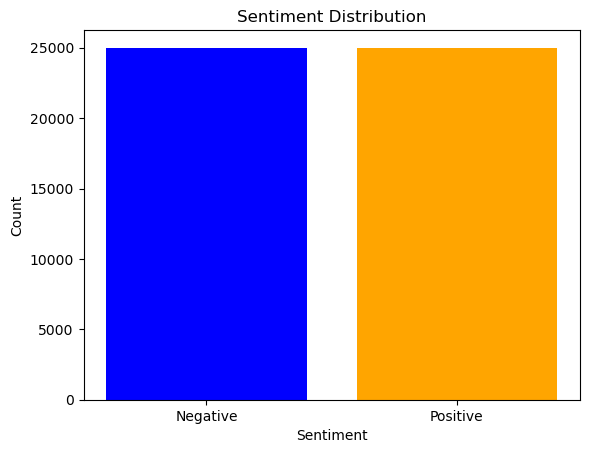

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('reviews.csv', encoding="ISO-8859-1")

sentiment_counts = df['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['blue', 'orange'])
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

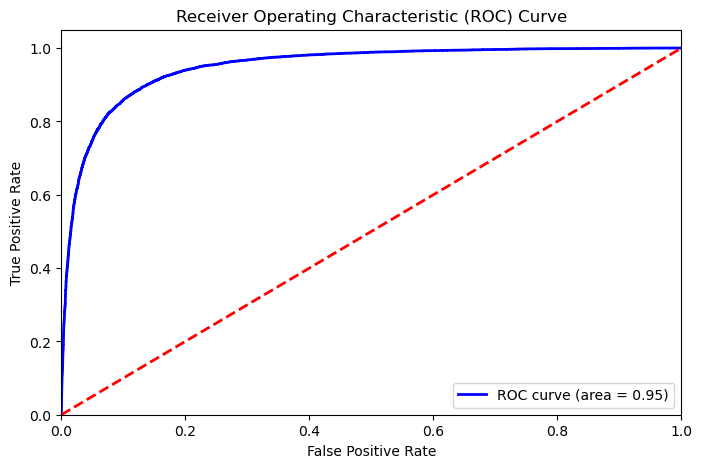

In [17]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


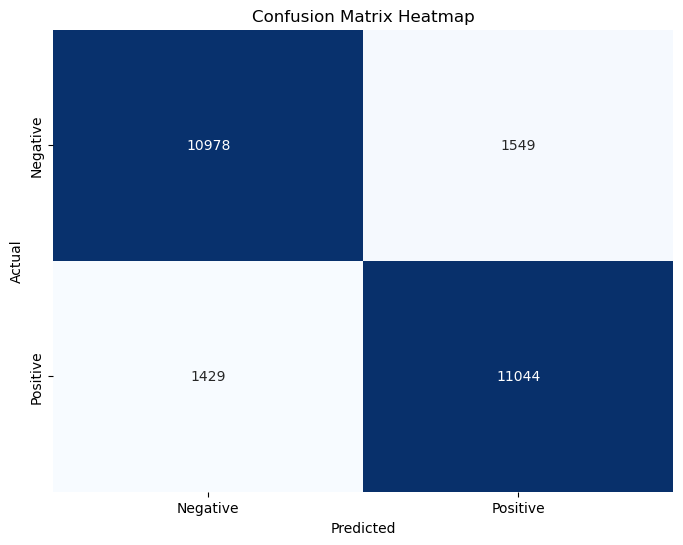

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('reviews.csv', encoding="ISO-8859-1")
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
